### Interpreting Pima Diabetes Prediction with Shap
+ SHAP(SHapley Additive exPlanations) :break down a prediction to show the impact of each feature.

In [53]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [54]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Labels For Columns/Header
+ Pregnancies::Number of times pregnant
+ Glucose::Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ BloodPressure::Diastolic blood pressure (mm Hg)
+ SkinThickness::Triceps skin fold thickness (mm)
+ Insulin::2-Hour serum insulin (mu U/ml)
+ BMI::Body mass index (weight in kg/(height in m)^2)
+ DiabetesPedigree::FunctionDiabetes pedigree function
+ Age::Age (years)
+ Outcome::Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 No DM, 1 has DM)

In [56]:
names = ["Num_of_Preg","Glucose_Conc","BP","Skin_Thickness","TwoHour_Insulin","BMI","DM_Pedigree","Age","Class"]

In [57]:
# Load Dataset
df = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [58]:
df.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [9]:
# Check For Missing Values
df.isna().sum()

Num_of_Preg        0
Glucose_Conc       0
BP                 0
Skin_Thickness     0
TwoHour_Insulin    0
BMI                0
DM_Pedigree        0
Age                0
Class              0
dtype: int64

In [10]:
# Data Types
df.dtypes

Num_of_Preg          int64
Glucose_Conc         int64
BP                   int64
Skin_Thickness       int64
TwoHour_Insulin      int64
BMI                float64
DM_Pedigree        float64
Age                  int64
Class                int64
dtype: object

In [11]:
# Check For Occurence of Class
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

<Axes: xlabel='Class'>

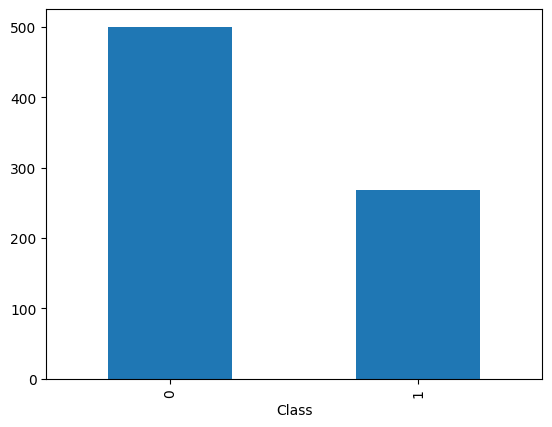

In [12]:
df.groupby('Class').size().plot(kind="bar")

In [13]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

<Axes: >

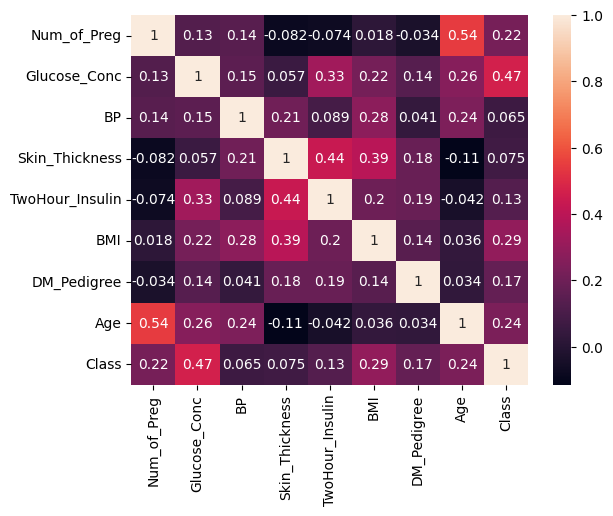

In [14]:
sns.heatmap(corr,annot=True)

### Narrative
+ Fig 1 : There are more patients without DM than with Dm
+ Fig 2: Correlation of various xtics    

In [15]:
#### Data Viz of Entire Dataset

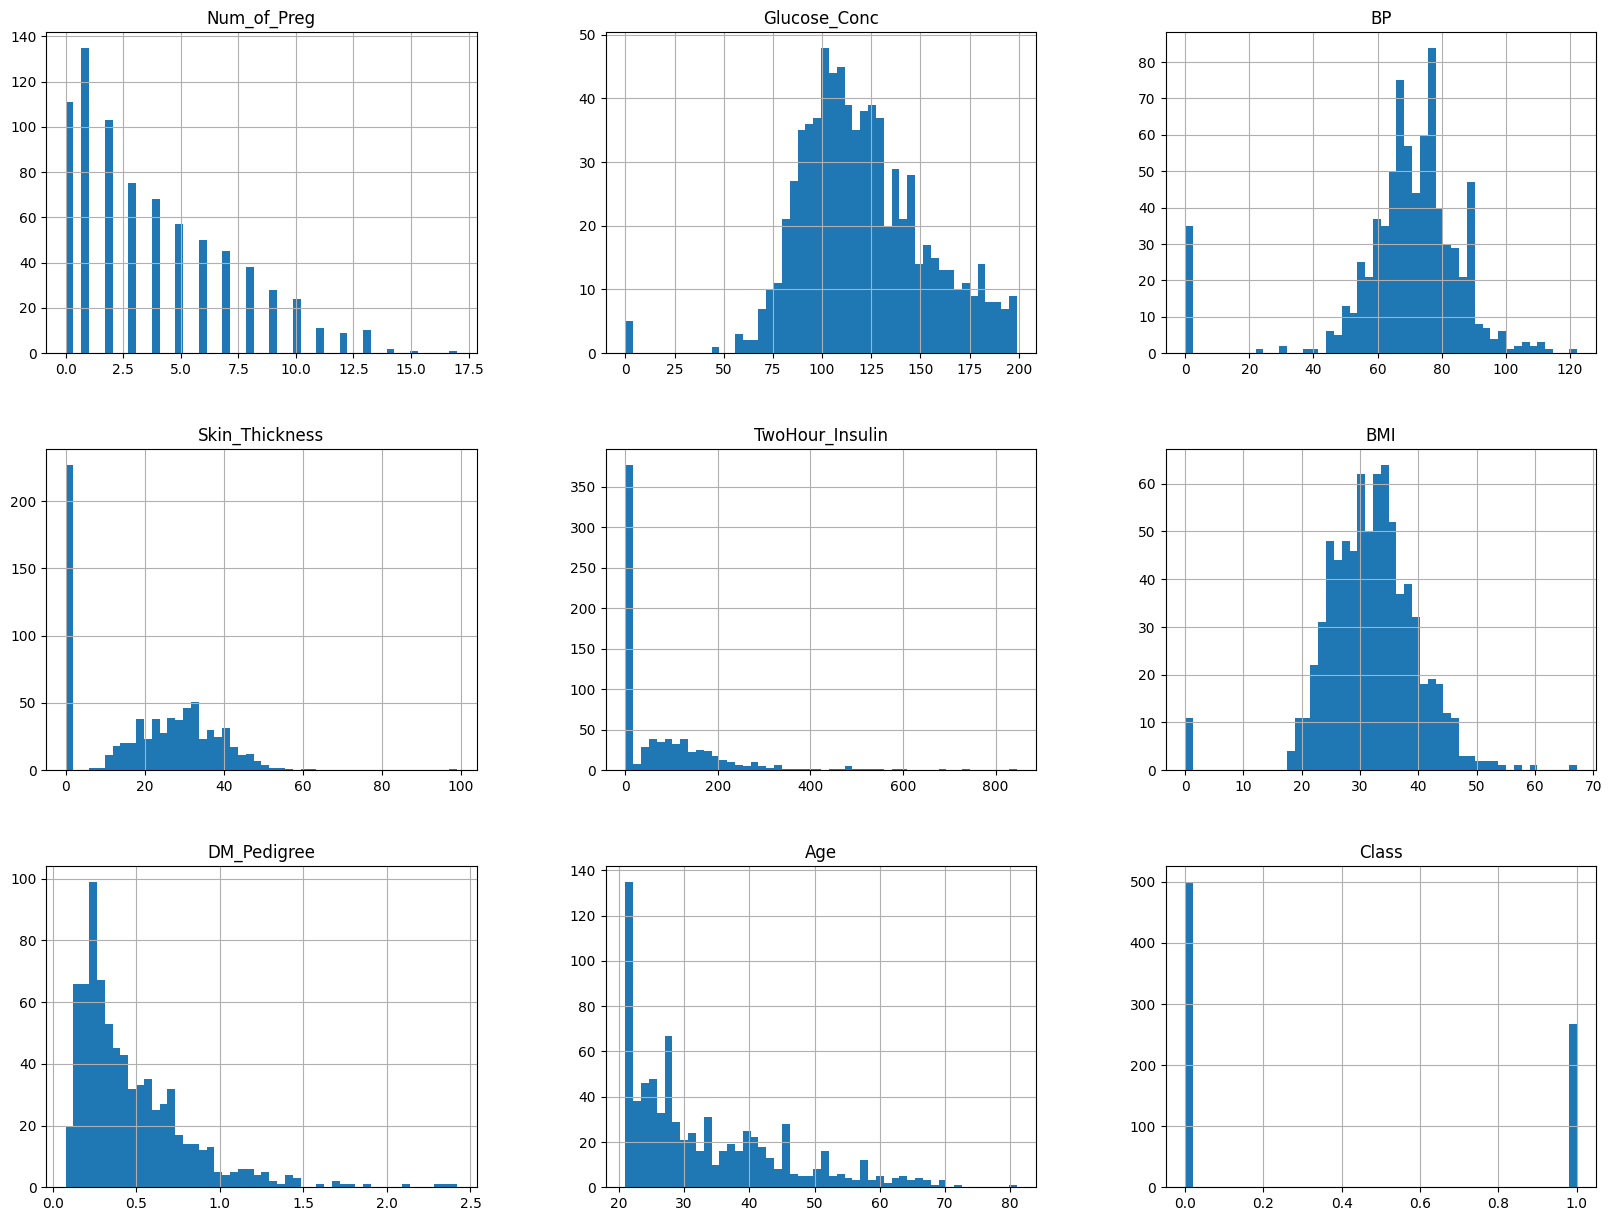

In [16]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [17]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_of_Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose_Conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TwoHour_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DM_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Data Cleaning 
+ Removing 0 sinces BP and BMI Cant be zero

In [18]:
# Checking For Minimum BP
df['BP'].min()

np.int64(0)

In [19]:
# Checking For Minimum BMI
df['BMI'].min()

np.float64(0.0)

In [20]:
# Replace 0 with Median not Mean
df['BP'] = df['BP'].replace(to_replace=0,value=df['BP'].median())

In [21]:
print("Zeros left in BP:", (df['BP'] == 0).sum())


Zeros left in BP: 0


In [22]:
# Recheck
df['BP'].min()

np.int64(24)

In [23]:
df[df["BP"] == 0]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class


In [24]:
zero_cols = ["Glucose_Conc", "BP", "Skin_Thickness", "BMI", "TwoHour_Insulin"]
for col in zero_cols:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

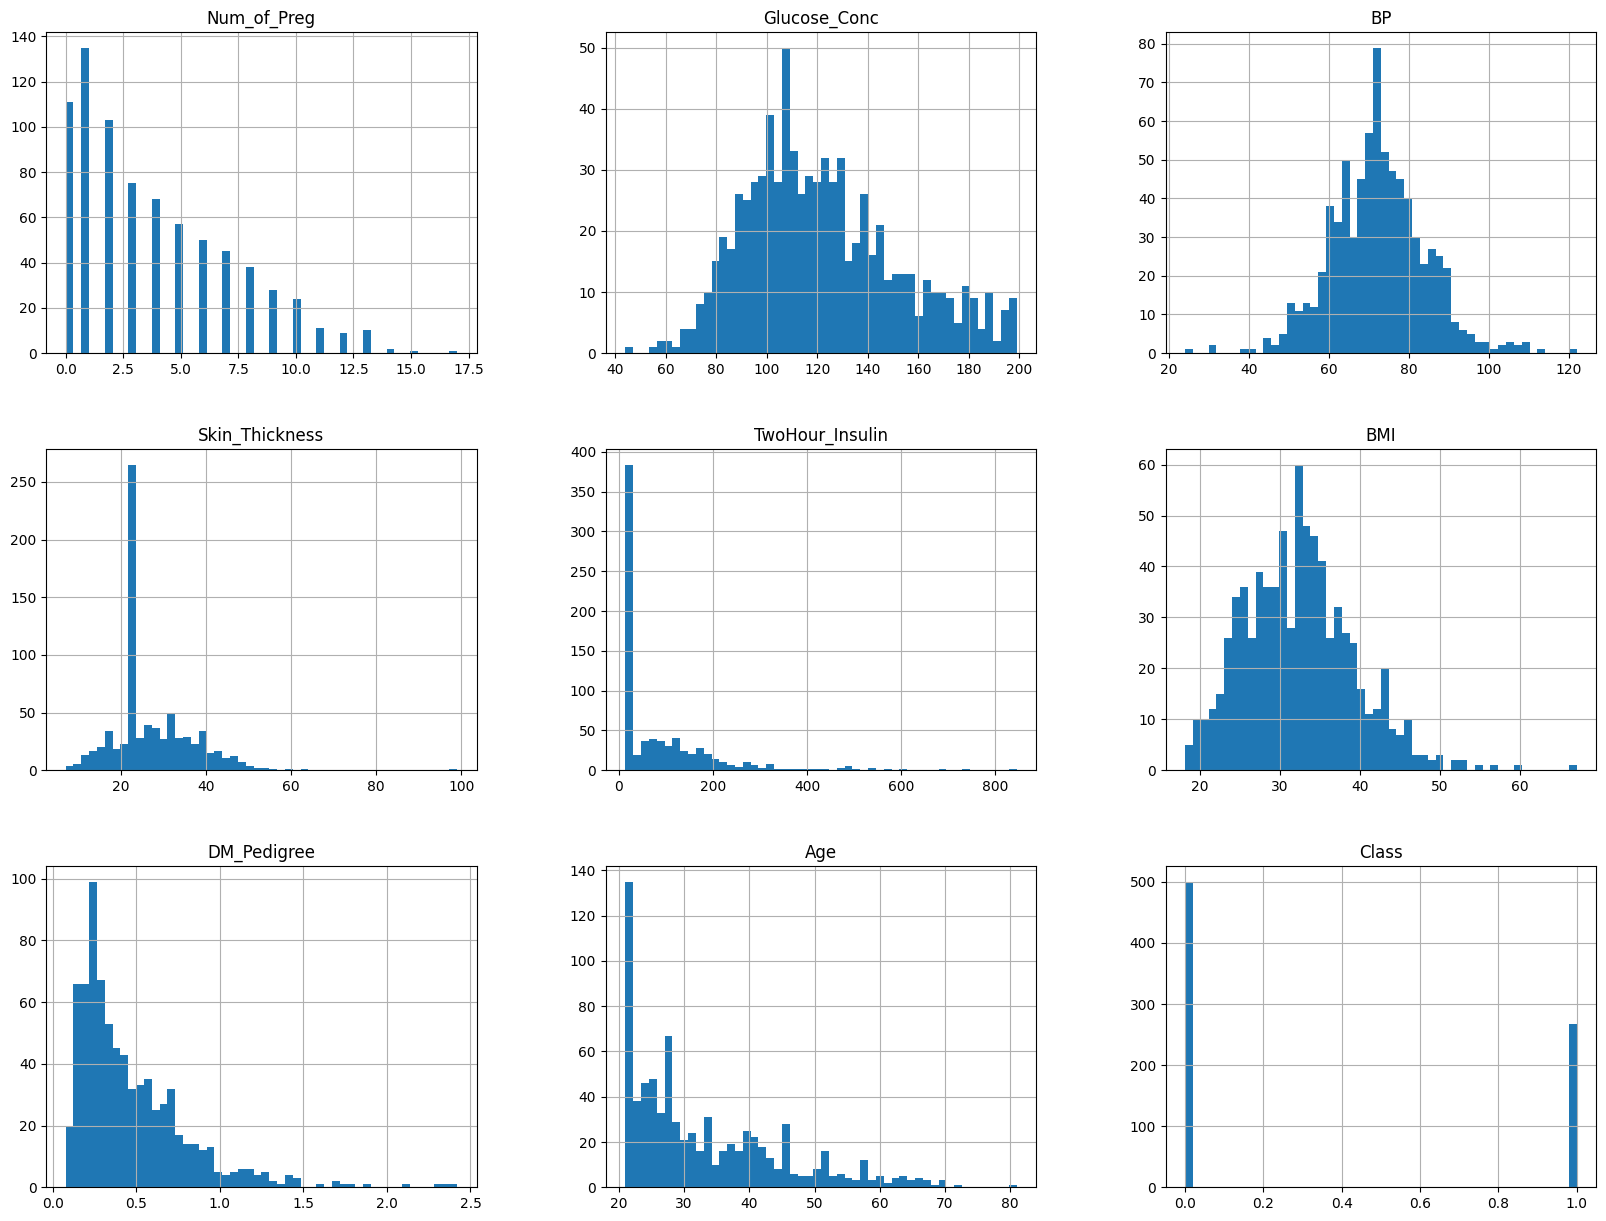

In [25]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### Feature Prep

In [26]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [27]:
df.shape

(768, 9)

In [28]:
df.iloc[:,0:8]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [29]:
Xfeatures = df.iloc[:,0:8]

In [30]:
Ylabels = df['Class']

### Scale Our Dataset

In [31]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [32]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [33]:
X.shape

(768, 8)

In [34]:
names[0:8]

['Num_of_Preg',
 'Glucose_Conc',
 'BP',
 'Skin_Thickness',
 'TwoHour_Insulin',
 'BMI',
 'DM_Pedigree',
 'Age']

In [35]:
X = pd.DataFrame(X,columns=names[0:8])

In [36]:
X.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


#### Split Dataset

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(614, 8)

### Building the Models
+ Logistic Regression
+ KNN

In [39]:
# Logit
# logit = LogisticRegression()
# logit.fit(X_train,y_train)

logit = LogisticRegression(
    solver="liblinear",   # better for small datasets
    max_iter=500,        # more iterations for convergence
    penalty="l2",
    C=1.0,                # regularization strength
    random_state=42
)
logit.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [40]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))


Accuracy Score of Logisitic:: 0.7727272727272727


/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [41]:
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.2826087 , 0.21153846,
       0.32310838, 0.15029889, 0.36666667])

In [42]:
# Prediction on A Single Sample
sample_pred = logit.predict(X_test.iloc[[0]])
sample_pred

array([0])

In [43]:
y_pred =logit.predict(X_test)

/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)


              precision    recall  f1-score     support
0              0.796296  0.868687  0.830918   99.000000
1              0.717391  0.600000  0.653465   55.000000
accuracy       0.772727  0.772727  0.772727    0.772727
macro avg      0.756844  0.734343  0.742192  154.000000
weighted avg   0.768116  0.772727  0.767542  154.000000


#### SHAP explainers
+ TreeExplainer :: XGBoost/LightGBM/CatBoost/scikit-learn models
        - shap.TreeExplainer(model)
+ DeepExplainer:: For Deep learning models eg (TensorFlow/Keras models)
        - shap.DeepExplainer(model, background/sample)
+ GradientExplainer:: Deep learning models eg (TensorFlow/Keras/PyTorch models)
        - shap.GradientExplainer((model.layers[7].input, model.layers[-1].output),map2layer(X, 7),local_smoothing=0 # std dev of smoothing noise)
+ KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation
        - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

In [45]:
# Load ML Interpreting Models
import shap

In [46]:
# Initialize JS For Plot
shap.initjs()

Prediction for first test sample: [0]


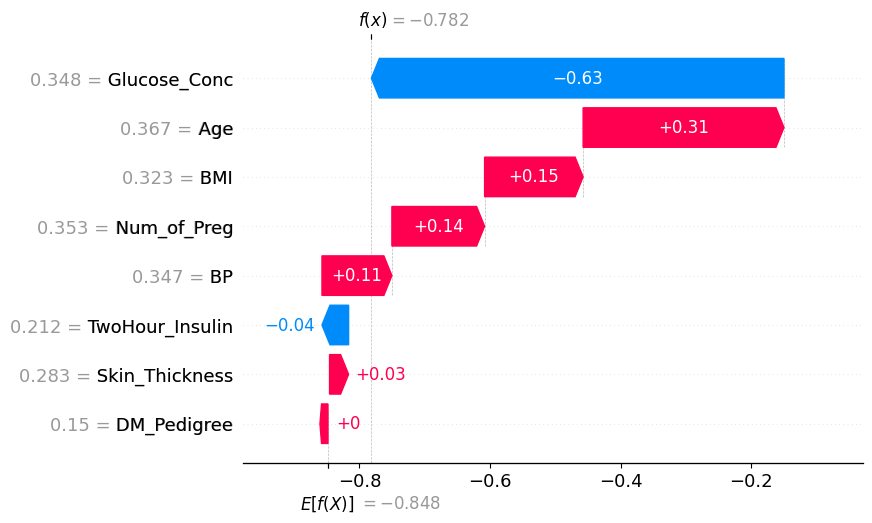

In [47]:

explainer = shap.Explainer(logit, X_train)

shap_values = explainer(X_test)

print("Prediction for first test sample:", sample_pred)
shap.plots.waterfall(shap_values[0])



In [48]:
X_test.iloc[[0]]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
668,0.352941,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667


=> values in the graph show the predicted probability in terms of log odds. Glucose Concentration has decreased the logg odds by -0.63

#### Narrative
+ Red :: Features that push the prediction to the base line
+ Blue :: Features that pull the prediction lower from the base line      
+ NB:: You can check for individual features and compare each feature with the other

=> shap values will tell us how much each feature contributed to the prediction
=> Numbers on the Y axis are the feature values 

In [49]:
ind = 0
shap.plots.force(shap_values[ind])

### Summary of All Effect of All Features
+ Using shap.summary_plot()

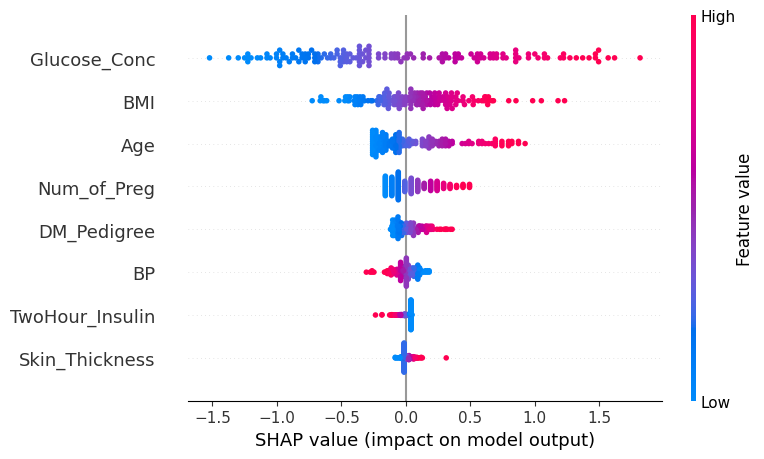

In [50]:
shap.summary_plot(shap_values,X_test)

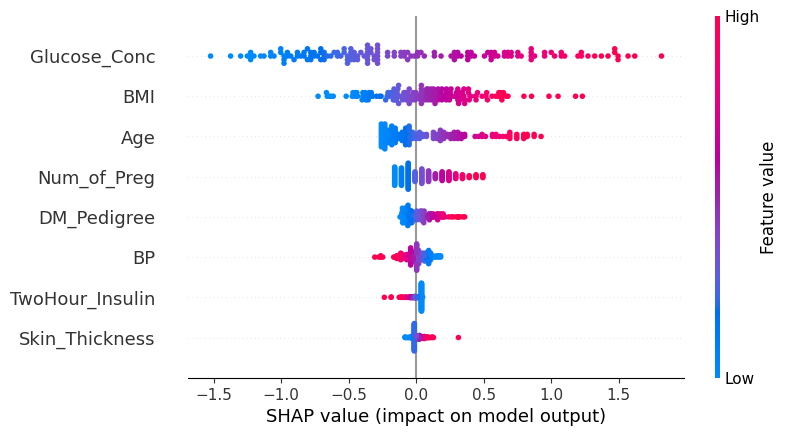

In [51]:
shap.plots.beeswarm(shap_values)

A SHAP summary plot provides a global view of feature importance and how each feature's values impact the model's output. The plot you provided illustrates the effect of different health-related features on a machine learning model's prediction. 
Here's a breakdown of how to interpret the different components of the plot:

### 1. Y-Axis: Feature Importance
The features are listed on the **Y-axis**, ordered by their **global importance** from top to bottom. The features at the top, such as **Glucose_Conc** and **BMI**, have the greatest impact on the model's predictions. This means that changes in these features cause the largest shifts in the model's output.

---

### 2. X-Axis: SHAP Value
The **X-axis** represents the **SHAP value**, which indicates the impact of a feature on the model's output.
* **Positive SHAP values** (to the right of the vertical line at 0) mean the feature's value pushes the prediction **higher**⬆️.
* **Negative SHAP values** (to the left of the vertical line at 0) mean the feature's value pushes the prediction **lower**⬇️.

---

### 3. Color and Point Distribution
Each **dot** on the plot represents a single instance from your dataset.
* The **color** of the dot indicates the **value of the feature** for that instance.
    * **Red** dots signify a **high** value for that feature.
    * **Blue** dots signify a **low** value for that feature.
* The horizontal spread of the dots shows the range of SHAP values for that feature. When many dots cluster in one area, it indicates a strong, consistent effect.

### Interpreting the Key Features in Your Plot

* **Glucose_Conc (Glucose Concentration):** The plot shows that high glucose levels (**red** dots) are associated with **positive SHAP values**, pushing the model's output higher (e.g., a higher probability of a positive outcome). Conversely, low glucose levels (**blue** dots) are associated with **negative SHAP values**, pushing the output lower. This suggests that high blood glucose is a major predictor of the positive outcome.

* **BMI (Body Mass Index):** Similarly, higher BMI values (**red** dots) have a strong **positive impact** on the model's output. The wide spread of dots indicates that BMI is a very important feature for this model.

* **Age:** The red dots for age are primarily on the positive side, indicating that older individuals tend to have higher model outputs.

This plot is a powerful way to understand not just which features are important, but also **how** different values of those features influence the model's predictions.

Check out this video for an introduction to the theory behind SHAP values and their applications in machine learning.
[SHAP values for beginners | What they mean and their applications](https://www.youtube.com/watch?v=MQ6fFDwjuco)
http://googleusercontent.com/youtube_content/0

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

### Optional : finding feature importance

In [52]:

# Get coefficients
coef = logit.coef_[0]  # shape (n_features,)
features = X_train.columns

# Create DataFrame for easy visualization
feature_importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef,
    "Absolute_Coefficient": np.abs(coef)
})

# Sort by absolute value
feature_importance = feature_importance.sort_values(by="Absolute_Coefficient", ascending=False)
feature_importance


,Feature,Coefficient,Absolute_Coefficient
1,Glucose_Conc,3.832887,3.832887
5,BMI,2.749666,2.749666
7,Age,1.542448,1.542448
6,DM_Pedigree,0.869854,0.869854
0,Num_of_Preg,0.853208,0.853208
2,BP,-0.723963,0.723963
4,TwoHour_Insulin,-0.416541,0.416541
3,Skin_Thickness,0.395496,0.395496


## References 

doccumentation : [Official doccumentation](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

githubbook: [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/shap.html)